# Assignment 1

## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [1]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [2]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [3]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

testing testing tesint

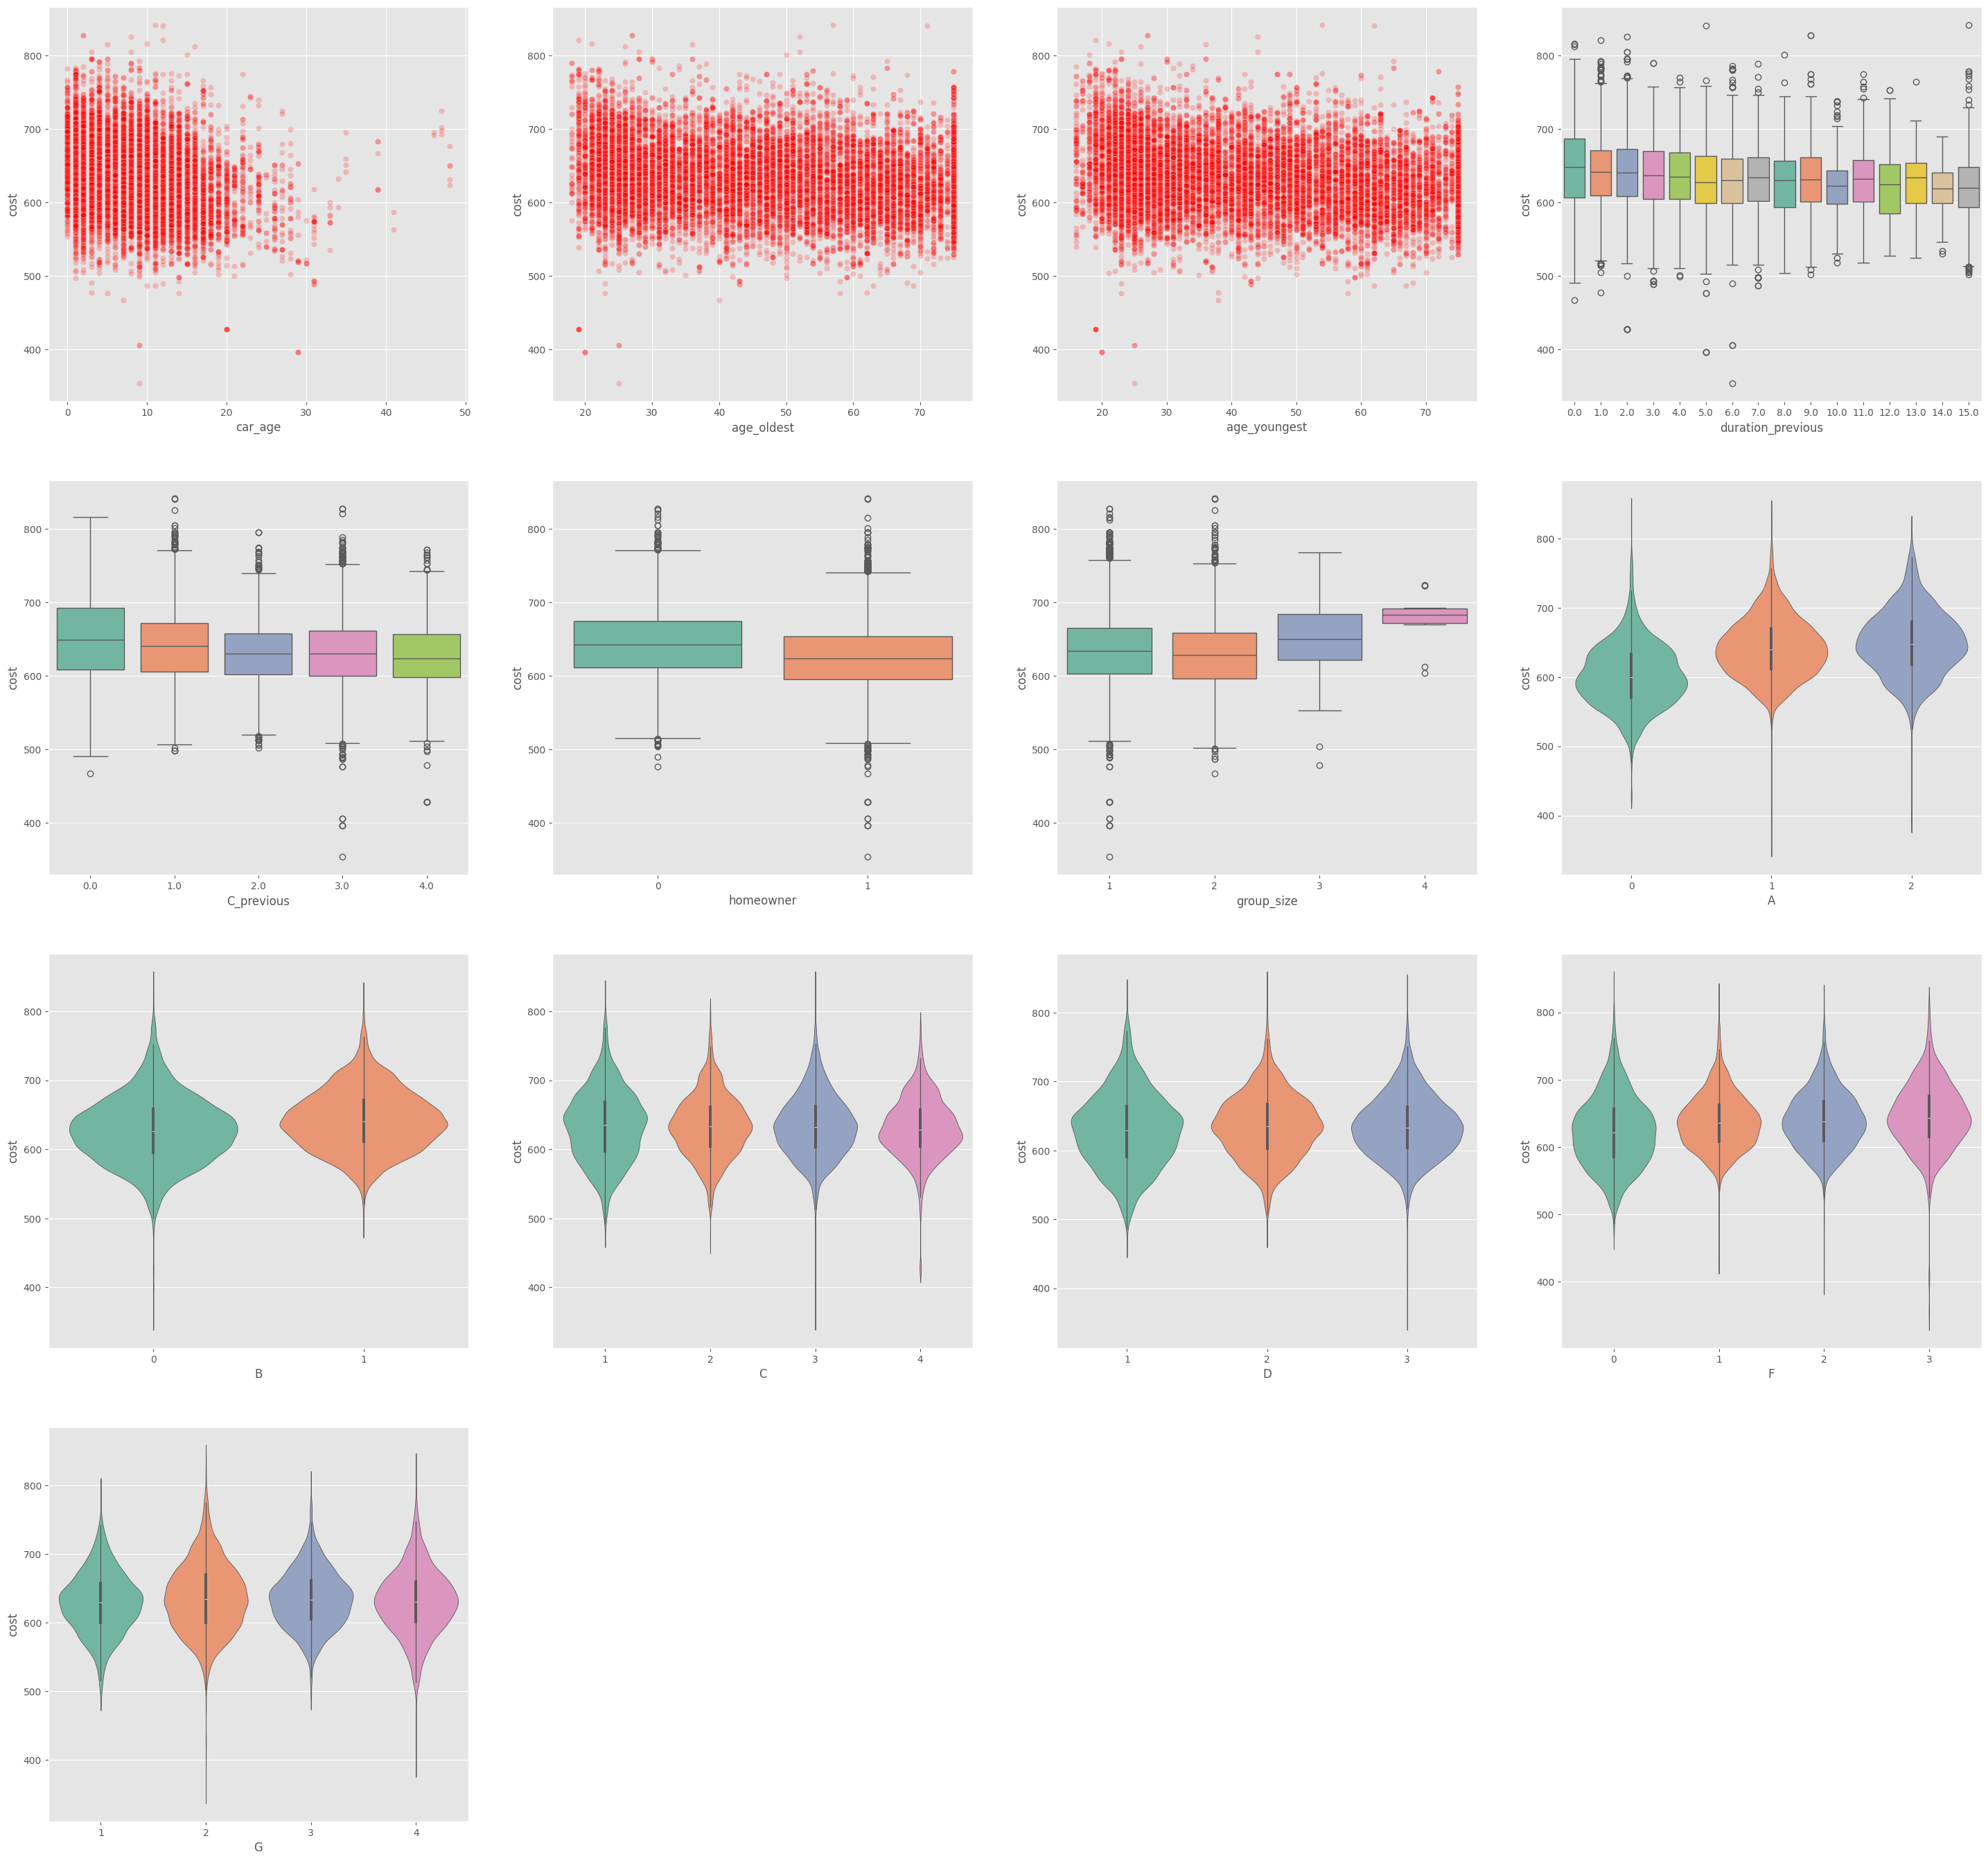

In [4]:
varstolook = ["car_age", "age_oldest", "age_youngest", "duration_previous", "C_previous", "homeowner", "group_size", "A" , "B", "C", "D", "F", "G"]
df2=df.copy()


plt.figure(figsize=(36,34))
for i,var in enumerate(varstolook):
    plt.subplot(4,4,i+1)
    if var in ["A" , "B", "C", "D", "F", "G"]:
        sns.violinplot(x=var, y='cost', data=df2, hue = var, palette = "Set2", legend=False)
    elif var in ["duration_previous", "C_previous", "homeowner", "group_size"]:
        sns.boxplot(x=var, y='cost', data=df2, hue = var, palette = "Set2", legend = False)
    else:
        sns.scatterplot(x=var,y='cost',data=df2, alpha = 0.2, color = 'r')




### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

In [5]:
df_encoded = pd.get_dummies(df, columns=['car_value', 'state', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], drop_first = True) 
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})
print(df_encoded)

       Unnamed: 0  group_size  homeowner  car_age  risk_factor  age_oldest  \
0               0           1          0        9          0.0          24   
1               1           1          0        9          0.0          24   
2               2           1          1        7          0.0          74   
3               3           1          1        7          0.0          74   
4               4           1          0        4          4.0          26   
...           ...         ...        ...      ...          ...         ...   
15478       15478           1          0        2          1.0          70   
15479       15479           1          0        2          1.0          70   
15480       15480           1          0        2          1.0          70   
15481       15481           1          1        0          3.0          25   
15482       15482           1          1        0          3.0          25   

       age_youngest  married_couple  C_previous  duration_previ

## Fitting a multiple linear regression

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

**Answer.**

In [6]:
train = df_encoded.sample(frac=0.8, random_state=1337)  
test = df_encoded.drop(train.index)                    
print('Training data:')
print(train)
print('\nTest data:')
print(test)


Training data:
       Unnamed: 0  group_size  homeowner  car_age  risk_factor  age_oldest  \
11418       11418           1          0       13          0.0          41   
8184         8184           1          0       13          3.0          48   
14214       14214           2          0        2          4.0          66   
1127         1127           1          1        3          0.0          29   
12528       12528           1          1       12          2.0          75   
...           ...         ...        ...      ...          ...         ...   
11774       11774           1          0        2          0.0          47   
8190         8190           1          1       13          1.0          67   
8321         8321           1          1        2          2.0          75   
425           425           1          0       14          4.0          27   
6434         6434           1          0        4          4.0          32   

       age_youngest  married_couple  C_previous 

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

In [7]:
model_all = smf.ols( formula = 'cost ~ ' + ' + '.join([col for col in df_encoded.columns if col != 'cost']), data = train).fit()
print(model_all.summary())
print("\nThe AIC is 1.237e+05")


                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     144.0
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:09:55   Log-Likelihood:                -61761.
No. Observations:               12386   AIC:                         1.237e+05
Df Residuals:                   12318   BIC:                         1.242e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           674.2012      5.47

#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

The most expensive states: New York (of course...), West Virginia, Delaware, and DC.
The least expensive: Iowa, Maine, Wisconsin

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**

Group size: 3.2, Cost increases as the group size covered increases (more expensive to cover one person than 4)
homeowner: -14.8, Cost decreases if a person is a homeowner (homeowners can be seen as more stable, less risky)
car_age: -0.67, cost of coverage slightly decreases as the age of the car increases (easier to replace an old car)
risk_factor: -0.37, cost decreases very slightly as customer risk factor increases
age_oldest: 0.6, cost increases slightly as the age of the oldest customer in the group increases (while they are more experienced, older people can also have health problems that may increase their risk while driving)
age_youngest: -1, cost decreases as the youngest customer in the group gets younger 
married_couple: -9.7, cost decreases quite a bit as the customer group includes more married couples (probably since they are lower risk)
duration_previous: -1.5, cost decreases as the previous length of coverage increases (you are probably seen as lower risk)

age_youngest is interesting, since I would expect the sign to be positive. Younger drivers are more accident prone due to inexperience, and are therefore riskier.
risk_factor also follows the same logic, though it's p-value is above 0.05, meaning not statistically significant.

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**

In [8]:
significant_vars = model_all.pvalues[model_all.pvalues < 0.05].index.tolist()

if 'Intercept' in significant_vars:
    significant_vars.remove('Intercept')

formula_sig = 'cost ~ ' + ' + '.join(significant_vars)

# Fit the new model with only significant variables
model_sig = smf.ols(formula=formula_sig, data=train).fit()

# Display summary of the new model
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     188.9
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:09:55   Log-Likelihood:                -61769.
No. Observations:               12386   AIC:                         1.236e+05
Df Residuals:                   12334   BIC:                         1.240e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           672.5925      3.85

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

In [9]:
car_value_columns = [col for col in train.columns if col.startswith('car_value_')]
age_value_interaction = [f'{col}*age_youngest' for col in car_value_columns]

formula_sig_plus = (
    'cost ~ ' + ' + '.join(significant_vars)  
    + ' + I(age_youngest**2) + I(car_age**2)'  
    + ' + ' + ' + '.join(car_value_columns)
    + ' + ' + ' + '.join(age_value_interaction)
)

model_sig_plus = smf.ols(formula=formula_sig_plus, data=train).fit()
print(model_sig_plus.summary())



                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     164.9
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:09:55   Log-Likelihood:                -61602.
No. Observations:               12386   AIC:                         1.233e+05
Df Residuals:                   12323   BIC:                         1.238e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [10]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

In [11]:
train2 = train.copy()
state_cols = [col for col in train2.columns if col.startswith("state_")]
state_codes = [col.replace("state_", "") for col in train2.columns]
train2['State Code'] = train2[state_cols].idxmax(axis=1).str.replace("state_", "")
train2_merged = train2.merge(state_regions[['State Code', 'Region']], on='State Code', how = 'left')
# train2_merged = train2_merged.drop(columns=['Region_x'])
train2_merged = train2_merged.rename(columns={'Region_y':'Region'})
print(train2_merged)















       Unnamed: 0  group_size  homeowner  car_age  risk_factor  age_oldest  \
0           11418           1          0       13          0.0          41   
1            8184           1          0       13          3.0          48   
2           14214           2          0        2          4.0          66   
3            1127           1          1        3          0.0          29   
4           12528           1          1       12          2.0          75   
...           ...         ...        ...      ...          ...         ...   
12381       11774           1          0        2          0.0          47   
12382        8190           1          1       13          1.0          67   
12383        8321           1          1        2          2.0          75   
12384         425           1          0       14          4.0          27   
12385        6434           1          0        4          4.0          32   

       age_youngest  married_couple  C_previous  duration_previ

#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

In [12]:
train2_merged_encoded = pd.get_dummies(train2_merged, columns=['Region'], drop_first = True) 
train2_merged_encoded = train2_merged_encoded.astype({col: int for col in train2_merged_encoded.select_dtypes(include=['bool']).columns})

state_replacement = [col for col in train2_merged_encoded.columns if col.startswith("state_")]

train2_merged_encoded.drop(columns=state_replacement, inplace=True)

significant_vars2 = [var for var in significant_vars if not var.startswith("state_")]

region_cols = [col for col in train2_merged_encoded.columns if col.startswith("Region_")]

if 'Intercept' in significant_vars2:
    significant_vars2.remove('Intercept')
    
formula_region = (
    'cost ~ ' + ' + '.join(significant_vars2)
    + ' + I(age_youngest**2) + I(car_age**2)'  
    + ' + ' + ' + '.join(car_value_columns)
    + ' + ' + ' + '.join(age_value_interaction)
    + ' + ' + ' + '.join(region_cols)
)

model_region = smf.ols(formula=formula_region, data=train2_merged_encoded).fit()
print(model_region.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     202.9
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:09:57   Log-Likelihood:                -62402.
No. Observations:               12386   AIC:                         1.249e+05
Df Residuals:                   12348   BIC:                         1.252e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

Remove any insignificant variables (P>0.05) to get rid of unnecessary noise, and removing redundant correlated variables to reduce multicollinearity.

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

In [13]:
numerical_features = [col for col in model_region.model.exog_names if col in train2_merged_encoded.select_dtypes(include=['number']).columns]
corr_mat  = train2_merged_encoded[numerical_features].corr()
corr_mat


,group_size,homeowner,car_age,age_oldest,age_youngest,married_couple,C_previous,duration_previous,car_value_b,car_value_c,...,E_1,F_1,F_2,F_3,G_2,G_4,car_value_i,Region_Northeast,Region_South,Region_West
group_size,1.000000,0.192858,-0.035703,0.211755,-0.028641,0.776404,0.074540,0.077419,0.003806,-0.027501,...,0.007494,0.006870,0.015337,0.019825,-0.027128,0.023355,0.042562,-0.010128,0.041763,0.017516
homeowner,0.192858,1.000000,-0.046454,0.410627,0.358290,0.192465,0.135556,0.179676,0.017921,-0.052450,...,0.059921,0.049050,0.016288,-0.019930,-0.041910,0.000827,0.027072,-0.012928,0.081177,-0.053721
car_age,-0.035703,-0.046454,1.000000,-0.023136,-0.023665,-0.041761,-0.123740,-0.057859,0.181350,0.200402,...,-0.251687,-0.078933,-0.137335,-0.087024,0.077744,-0.033126,-0.031598,-0.046363,-0.050331,0.043080
age_oldest,0.211755,0.410627,-0.023136,1.000000,0.917184,0.202122,0.130631,0.270057,0.000628,-0.037977,...,0.098509,0.067845,-0.017057,-0.021695,-0.043175,0.034551,0.033530,0.031670,0.083987,-0.082788
age_youngest,-0.028641,0.358290,-0.023665,0.917184,1.000000,0.099764,0.122991,0.246696,0.004193,-0.041509,...,0.099905,0.075263,-0.017945,-0.023760,-0.051670,0.036758,0.032598,0.028718,0.081807,-0.087746
married_couple,0.776404,0.192465,-0.041761,0.202122,0.099764,1.000000,0.061613,0.067963,0.007448,-0.040049,...,0.013603,0.004190,0.000781,0.013869,-0.018480,0.033382,0.067593,0.022511,0.029428,0.007728
C_previous,0.074540,0.135556,-0.123740,0.130631,0.122991,0.061613,1.000000,0.254975,-0.035146,-0.045784,...,0.133483,0.080150,-0.000892,-0.066769,-0.045032,0.038004,0.051852,0.129808,-0.086997,-0.049201
duration_previous,0.077419,0.179676,-0.057859,0.270057,0.246696,0.067963,0.254975,1.000000,-0.009248,-0.016433,...,0.097499,0.096623,-0.014018,-0.038050,-0.051280,0.054218,0.011058,0.041001,0.069801,-0.072062
car_value_b,0.003806,0.017921,0.181350,0.000628,0.004193,0.007448,-0.035146,-0.009248,1.000000,-0.009560,...,-0.032720,-0.023758,-0.007448,-0.004778,0.002123,-0.001101,-0.004177,-0.024990,0.038526,-0.005825
car_value_c,-0.027501,-0.052450,0.200402,-0.037977,-0.041509,-0.040049,-0.045784,-0.016433,-0.009560,1.000000,...,-0.039408,-0.005374,-0.060330,-0.015971,0.026297,-0.000806,-0.014505,-0.004755,-0.008323,0.010102


Text(0.5, 1.0, 'Correlation Matrix')

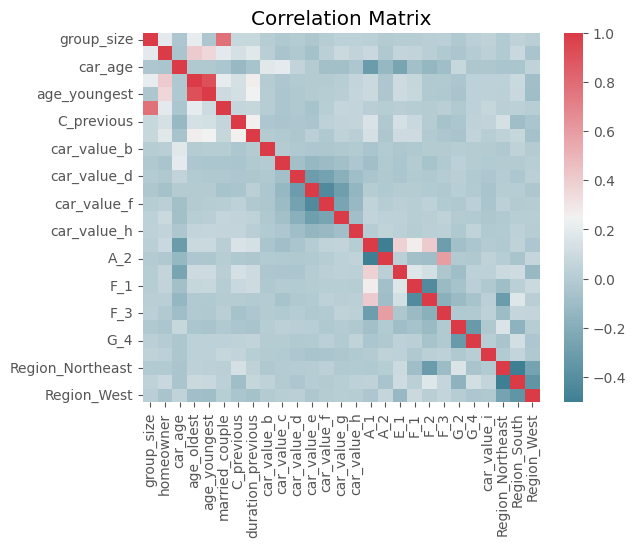

In [14]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

The features that exhibit multicollinearity are married_couple with group size, and age_oldest with age_youngest.

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

In [22]:
train3=train2_merged_encoded.copy()
significant_vars3 = [var for var in significant_vars2 if not var.startswith(('group_', 'age_old'))]
formula_region_no_oldest = (
    'cost ~ ' + ' + '.join(significant_vars3)  
    + ' + I(age_youngest**2) + I(car_age**2)'  
    + ' + ' + ' + '.join(car_value_columns)
    + ' + ' + ' + '.join(age_value_interaction)
    + ' + ' + ' + '.join(region_cols)
)
model_region_no_oldest = smf.ols(formula=formula_region_no_oldest, data=train3).fit()
print(model_region_no_oldest.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     208.6
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:13:36   Log-Likelihood:                -62466.
No. Observations:               12386   AIC:                         1.250e+05
Df Residuals:                   12350   BIC:                         1.253e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

-The peak is slightly higher than normal distribution
-Roughly equal number of outliers on each side of the distribution, residuals are mostly symmetrical, though there are some large ones.
-The residual distribution is narrower on the right side than the normal distribution, though not much.
-There are noticeable clusters in the scatter plot that are either above or below what the model predicted, rather than gathering around the 0 line.
-Kurtosis shows some outliers.
-The qq plot shows some signs of non-linearity.

All these points tell me that a linear model may not be the most appropriate to apply in this scenario.


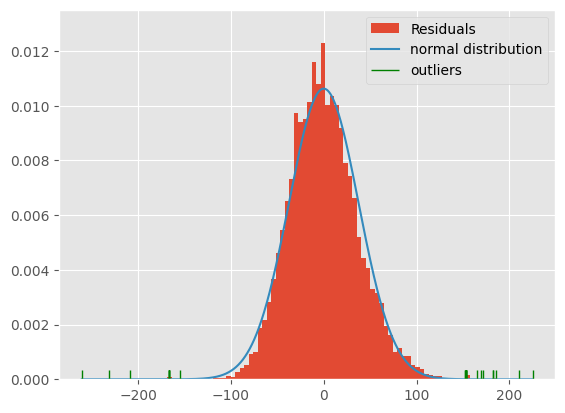

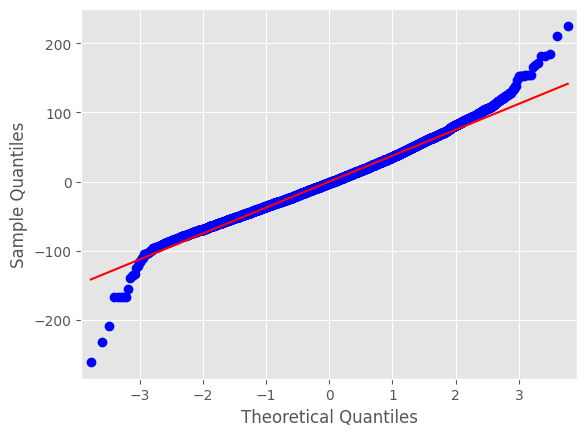

In [53]:
import scipy
plt.hist(model_region_no_oldest.resid, density = 1, bins = 100, label = 'Residuals') #histogram of residuals
norm_dist = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(norm_dist, scipy.stats.norm.pdf(norm_dist, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)), label="normal distribution") #normal curve

outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)

sns.rugplot(model_region_no_oldest.resid[outliers],
            color="g", 
            label="outliers")
plt.legend(loc="upper right")


sm.qqplot(model_region_no_oldest.resid, line="s", markerfacecolor = "b", markeredgecolor = "b"); #qq of residuals

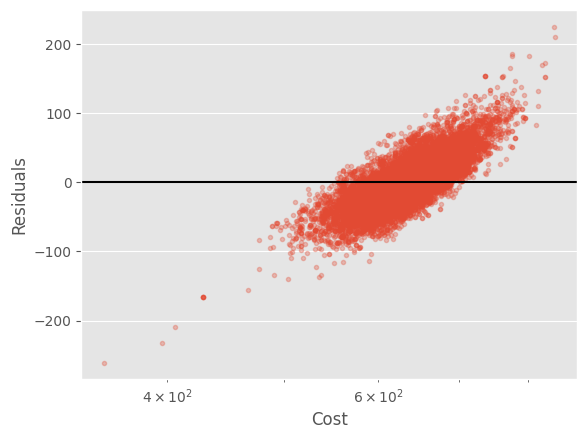

In [66]:
#residual scatter
plt.semilogx(train3["cost"], model_region_no_oldest.resid, ".", alpha=0.3)
plt.ylabel("Residuals")
plt.xlabel("Cost")
plt.axhline(0, color="black")

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

In [87]:
from scipy import stats

cost,fitted_lambda = stats.boxcox(train3['cost'])
round(fitted_lambda,2) #using sqrt since boxcox is 0.5

0.5

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

In [110]:
formula_box_cox = (
    'np.sqrt(cost) ~ ' + ' + '.join(significant_vars3)  
    + ' + I(age_youngest**2) + I(car_age**2)'  
    + ' + ' + ' + '.join(car_value_columns)
    + ' + ' + ' + '.join(age_value_interaction)
    + ' + ' + ' + '.join(region_cols)
)
model_region_no_oldest_box_cox = smf.ols(formula = formula_box_cox, data=train3).fit()
print(model_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     210.2
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:02:43   Log-Likelihood:                -13904.
No. Observations:               12386   AIC:                         2.788e+04
Df Residuals:                   12350   BIC:                         2.815e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Removing all statistically insignificant variables:

In [109]:
significant_vars4 = model_region_no_oldest_box_cox.pvalues[model_region_no_oldest_box_cox.pvalues < 0.05].index.tolist()
if 'Intercept' in significant_vars4:
    significant_vars4.remove('Intercept')
formula_box_cox = (
    'np.sqrt(cost) ~ ' + ' + '.join(significant_vars4)  
    # + ' + I(age_youngest**2) + I(car_age**2)'  
    # + ' + ' + ' + '.join(car_value_columns)
    # + ' + ' + ' + '.join(age_value_interaction)
    # + ' + ' + ' + '.join(region_cols)
)
model_region_no_oldest_box_cox = smf.ols(formula = formula_box_cox, data=train3).fit()
print(model_region_no_oldest_box_cox.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(cost)   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     290.0
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:02:20   Log-Likelihood:                -13940.
No. Observations:               12386   AIC:                         2.793e+04
Df Residuals:                   12360   BIC:                         2.813e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.1874 

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 